# 빅데이터프로그래밍
       
       
11주 1강: Machine Learning Basics
<br/><br/>

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# Today
- 머신러닝이란 무엇인가
- 회귀분석?
- 선형회귀분석
- 로지스틱회귀분석

# What Is Machine Learning?

## Categories of Machine Learning

* 머신러닝은 크게는 두가지로 나뉩니다.
 * 지도학습: 정답을 알려줌
 * 비지도학습: 정답을 알려주지 않음

<img src = "Figs/ml_map.png" width=1024>

### Classification: Predicting discrete labels
![](Figs/05.01-classification-3.png)

### Regression: Predicting continuous labels
![](Figs/05.01-regression-1.png)

![](Figs/05.01-regression-2.png)

![](Figs/05.01-regression-3.png)

### Clustering: Inferring labels on unlabeled data
![](Figs/05.01-clustering-1.png)

![](Figs/05.01-clustering-2.png)

### Dimensionality reduction: Inferring structure of unlabeled data
![](figs/05.01-dimesionality-1.png)

Isomap algorithm을 사용하면 아래처럼 됩니다.
![](figs/05.01-dimesionality-2.png)

## Short Summary

- *지도 학습* : 레이블이 지정된 학습 데이터를 기반으로 레이블을 예측할 수있는 모델
 - *분류* : 라벨을 두 개 이상의 개별 카테고리로 예측하는 모델
 - *회귀* : 연속 레이블을 예측하는 모델
  
- *비지도 학습* : 라벨이없는 데이터의 구조를 식별하는 모델
 - *클러스터링* : 데이터에서 고유 한 그룹을 감지하고 식별하는 모델
 - *차원 축소* : 고차원 데이터에서 저 차원 구조를 감지하고 식별하는 모델
 
짧은 시간이라 강의에 모든 것을 할 수는 없고, 지도학습, 그리고 분류와 회귀 (의 일부 알고리즘에) 집중해서 공부해 봅시다. 

# Linear Regression

In [ ]:
# 선형회귀 문제
# 변수를 입력하고, 값을 계산하는 문제
# 선형함수를 사용하느 회귀가 linear regression

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 합니다. 

위에서 보았듯, 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 합니다.

### 보스턴 집값 예측

sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공합니다. 그 중 `load_boston()` 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터입니다. 보스턴의 506개 타운(town)의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측하는 문제를 풀 수 있습니다.

* 독립변수
 * `CRIM`: 범죄율
 * `INDUS`: 비소매상업지역 면적 비율
 * `NOX`: 일산화질소 농도 
 * `RM`: 주택당 방 수
 * `LSTAT`: 인구 중 하위 계층 비율
 * `B`: 인구 중 흑인 비율
 * `PTRATIO`: 학생/교사 비율
 * `ZN`: 25,000 평방피트를 초과 거주지역 비율
 * `CHAS`: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 * `AGE`: 1940년 이전에 건축된 주택의 비율
 * `RAD`: 방사형 고속도로까지의 거리
 * `DIS`: 직업센터의 거리
 * `TAX`:	재산세율
 
* 종속변수
 * 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

`load_boston` 명령으로 받는 데이터 집합은 `Bunch` 라는 클래스 객체로 생성됩니다. 이 클래스 객체는 다음과 같은 속성을 가집니다.


 * `data`: 독립변수 `ndarray` 배열
 * `target`: 종속변수 `ndarray` 배열
 * `feature_names`: 독립변수 이름 리스트
 * `target_names`: (옵션) 종속변수 이름 리스트
 * `DESCR`: (옵션) 자료에 대한 설명 문자열

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

분석할 데이터는 pandas 일단 데이터프레임 형태로 만들겠습니다. 여기에서는 독립변수 행렬을 `dfX`로, 종속변수 벡터를 `dfy`로 만들겠습니다. 종속변수의 이름은 MEDV로 지정하겠습니다.

In [2]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

독립변수과 종속변수 데이터프레임을 하나의 데이터프레임으로 묶어두면 편리합니다.

In [3]:
df = pd.concat([dfX, dfy], axis=1) # concat으로 데이터프레임 합치기
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


일부 독립변수와 종속변수의 관계를 스캐터플롯(scatter plot)으로 살펴보겠습니다.

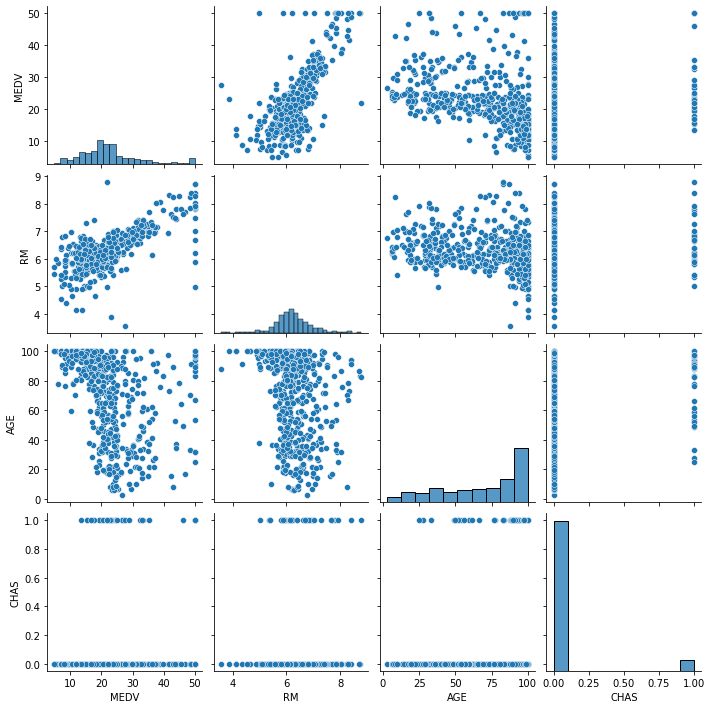

In [4]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]]) #변수들의 조합으로 스캐터를 그려준다
plt.show()

이 플롯의 첫 행을 보면 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있습니다.

* 방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.
* 노후화 정도와 집값은 관계가 없어 보인다.

또한 스케터플롯의 모양으로부터 찰스강 유역 여부(CHAS)는 범주값이며 값이 1이면 0일 때 보다 집값의 평균이 더 높아지는 것도 볼 수 있습니다.

### Note on Linear Regression
확률 및 통계 과목을 수강하셨다면 Ordinary Least Squrares 방법을 배우셨을 것이라 생각합니다. 하지만 간단하게 다시 짚고 넘어갑시다.

회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정입니다.

$$ 
\hat{y} = f \left( x \right) \approx y 
$$

만약 $f(x)$가 다음과 같은 선형함수면 이 함수를 **선형회귀모형(linear regression model)**이라고 합니다. 
그리고 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 합니다.

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx 
$$

위 식에서 독립변수 $x=(x_1, x_2, \ldots, x_D)$는 $D$차원 벡터로 생각할 수 있습니다.가중치 벡터 $w=(w_0, \cdots, w_D)$는 함수 $f(x)$의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)**라고 합니다.

### Ordinary Least Squares
최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법입니다. 

재밌는건 선형함수의 경우 최대가능도 방법을 쓰는 것과 최소자승법을 쓰는 것이 같은 결과를 줍니다. 즉, 이 방법이 가장 좋은 방법입니다.

확률 및 통계에서는 독립변수가 

일반적으로 우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형모형입니다.

$$ \hat{y} = Xw $$

이때 잔차 벡터(residual vector) $e$는

$$ e = {y} - \hat{y} = y - Xw $$

이고 잔차 제곱합(RSS:residual sum of squares)은

$$
\begin{aligned}
\text{RSS}
&=  e^Te \\
&= (y - Xw)^T(y - Xw) \\
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$

으로 주어집니다. 잔차의 크기(잔차 제곱합)를 가장 작게 하는 가중치 벡터를 구하기 위해 이 식을 미분하여 잔차 제곱합의 그레디언트(gradient) 벡터를 구하면 다음과 같습니다.

$$ 
\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w 
$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립합니.

$$ 
\dfrac{d \text{RSS}}{d w} = 0 
$$

$$ 
X^TX w^{\ast} = X^T y 
$$

만약 $X^TX$ 행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w^{\ast}$를 구할 수 있습니다.

$$ 
w^{\ast} = (X^TX)^{-1} X^T y 
$$

$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면 잔차 제곱합의 헤시안 행렬인 $X^TX$가 양의 정부호(positive definite)이어야만 합니다.

$$ 
\frac{d^2 \text{RSS}}{dw^2} = 2X^TX > 0 
$$

$X$의 각 행렬이 서로 독립($X$가 풀랭크)이 아니면 $X^TX$가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없습니다.

### Linear regression using Statmodels
statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형 회귀분석을 할 수 있습니다. `OLS` 클래스 사용법은 다음과 같습니다.

1. 독립변수와 종속변수가 모두 포함된 데이터프레임을 만듭니다.


2. `OLS` 클래스 객체를 생성합니다. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣습니다. 
   data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣습니다..
    ```
    model = OLS.from_formula(formula, data=df)
    ```
    또는 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있습니다. 이 때는 독립변수만 있는 데이터프레임 `dfX`가 상수항을 가지고 있어야만 합니다.
    
    ```
    model = OLS(dfy, dfX)
    ```

In [ ]:
# OLS 클래스 : 선형회귀 분석해주는 클래스


3. `fit` 메서드로 모형을 추합니다정. 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력됩니다.
    ```
    result = model.fit()
    ```

4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공합니다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 합니다..

1차원 데이터 예제를 statsmodels의 `OLS` 명령으로 선형회귀를 하면 다음과 같습니다. 우선 독립변수와 종속변수가 모두 포함된 데이터프레임을 생성합시다.

In [5]:
from sklearn.datasets import make_regression
bias = 100

X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
y = y.reshape(len(y), 1)
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


다음으로 모델 객체를 만듭니다. 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있습니다. 이 때는 수동으로 상수항 추가를 해주어야 합니다.

In [6]:
import statsmodels.api as sm
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]]) # 상수항 추가
model = sm.OLS(dfy, dfX)
result = model.fit()

In [7]:
dfX

,const,x
0,1.0,0.232495
1,1.0,-0.038696
2,1.0,0.550537
3,1.0,0.503185
4,1.0,2.186980
...,...,...
195,1.0,-0.172428
196,1.0,-1.199268
197,1.0,1.462108
198,1.0,1.131629


또는 formula 문자열을 사용하여 모형을 만들 수도 있습니다. formula 문자열을 만드는 방법은 `~` 기호의 왼쪽에 종속변수의 이름을 넣고 `~` 기호의 오른쪽에 독립변수의 이름을 넣으면 됩니다. 

만약 독립변수가 여러개일 경우에는 `'Y ~ x_1 + x_2 + ... + x_n'` 형태로 만들면 됩니다.

In [8]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

`RegressionResults` 클래스 객체의 `summary` 메서드는 복잡한 형태의 보고서를 보여줍니다.

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sat, 08 May 2021   Prob (F-statistic):          8.17e-182
Time:                        21:38:58   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

`RegressionResults` 클래스 객체의 `predict` 메서드를 사용하면 새로운 $x_{new}$ 값에 대응하는 $y$ 값을 예측할 수 있습니다.

In [10]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있습니다. 자주 사용되는 속성으로는 다음과 같은 것들이 있지요.
* `params`: 가중치 벡터
* `resid`: 잔차 벡터

가중치 벡터의 값은 다음처럼 확인하면 됩니다.

In [11]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

잔차 벡터의 형태는 다음과 같습니다.

In [12]:
result.resid

0       7.869384
1      -3.393567
2      14.190317
3      -1.857271
4      -6.714883
         ...    
195     3.077420
196    -9.127772
197   -10.832299
198    14.543212
199     7.161656
Length: 200, dtype: float64

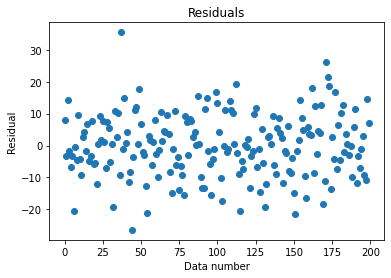

In [13]:
result.resid.plot(style="o")
plt.title("Residuals")
plt.xlabel("Data number")
plt.ylabel("Residual")
plt.show()

In [14]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [15]:
y.mean()

109.06935068170773

### Estimating House price of Boston
위의 보스턴 집값 데이터를 statsmodels의 `OLS` 명령으로 분석한 결과는 다음과 같습니다. 

In [16]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 08 May 2021   Prob (F-statistic):          6.72e-135
Time:                        21:41:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

따라서 보스턴 집값을 예측하는 식은 다음과 같습니다.

$$
\begin{aligned}
y &= 36.4595 - 0.1080\,\text{CRIM} + 0.0464\,\text{ZN}  + 0.0206\,\text{INDUS}  + 2.6867 \,\text{CHAS} \\
&  -17.7666\,\text{NOX}  + 3.8099\,\text{RM}  + 0.0007\,\text{AGE}  -1.4756\,\text{DIS} + 0.3060\,\text{RAD} \\
&  -0.0123\,\text{TAX}  -0.9527\,\text{PTRATIO}  + 0.0093 \,\text{B} -0.5248\,\text{LSTAT}
\end{aligned}
$$

# Logistic Regression

로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있습니다.

선형 회귀와 다르게 로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따릅니다.

$$ \binom{N}{k}p^k(1-p)^{N-k} $$

그 모수 $\mu$가 독립변수 $x$에 의존한다고 가정합니다.

$$ p(y \mid x) = \text{Bin} (y; \mu(x), N) $$

위 식에서 보듯이 로지스틱 함수는 $y$의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있습니다.  

또는 이항 분포의 특별한 경우($N=1$)로 $y$가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$$ p(y \mid x) = \text{Bern} (y; \mu(x) ) $$

$$ \text{Bernp} = p^y(1-p)^{1-y} $$

종속변수 $y$가 0또는 1인 분류 예측 문제를 풀 때는 $x$ 값을 이용하여 $\mu(x)$를 예측한 후 다음 기준에 따라 $\hat{y}$값을 출력합니다.

$$ \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} $$

회귀분석을 할 때는 $\hat{y}$으로 $y=1$이 될 확률값 $\mu(x)$를 직접 사용합니다.

$$ \hat{y} = \mu(x) $$

### Sigmoid Function

로지스틱 회귀모형에서는 베르누이 확률분포의 모수 $\mu$가 $x$의 함수라고 가정합니다. 그리고 $\mu(x)$는 $x$에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 **시그모이드함수(sigmoid function)**라는 함수를 사용하여 변형한 것을 사용합니다.

시그모이드함수는 종속변수의 모든 실수 값에 대해 

* 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값을 가지고
$$ a < f(x) < b $$
* 항상 양의 기울기를 가지는 단조증가하는
$$ a > b \; \rightarrow \; f(a) > f(b) $$

함수의 집합을 말합니다. 

실제로는 다음과 같은 함수들이 주로 사용됩니다.

 * 로지스틱(Logistic)함수 
 
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 하이퍼볼릭탄젠트(Hyperbolic tangent)함수 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$

 * 오차(Error)함수
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 

하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다. 

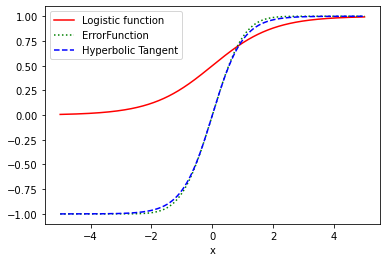

In [17]:
import numpy as np
import scipy as sp
import scipy.special
from matplotlib import pyplot as plt 
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic function")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="ErrorFunction")
plt.plot(xx, np.tanh(xx), 'b--', label="Hyperbolic Tangent")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

### Logistic Function
로지스틱함수는 음의 무한대부터 양의 무한대까지의 실수값을 0부터 1사이의 실수값으로 1 대 1 대응시키는 시그모이드함수입니다. 보통 시그모이드함수라고 하면 로지스틱함수를 많이 씁니다. 로지스틱함수는 다음 과정을 통해 역으로 정의되었습니다.

베르누이 시도에서 1이 나올 확률 $\mu$와 0이 나올 확률 $1-\mu$의 비율(ratio)을 승산비(odds ratio)라고 합니다.

$$ \text{odds ratio} = \dfrac{\mu}{1-\mu} $$

0부터 1사이의 값만 가지는 $\mu$를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있습니다.

승산비를 로그 변환한 것이 로지트함수(Logit function)다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right) $$ 

로지트함수의 값은 로그 변환에 의해 음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가질 수 있습니다.

로지스틱함수(Logistic function)는 로지트함수의 역함수입니다 (중요!!!). 즉 **음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가지는 입력변수를 0부터 1사의 값을 가지는 출력변수로 변환**한 것입니다.

$$ \text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}} $$  

### Linear decision function
로지스틱함수 $\sigma(z)$를 사용하는 경우에는 $z$값과 $\mu$값은 다음과 같은 관계가 있습니다.

* $z = 0$일 때 $\mu = 0.5$
* $z > 0$일 때 $\mu > 0.5 \; \rightarrow \hat{y} = 1$
* $z < 0$일 때 $\mu < 0.5 \; \rightarrow \hat{y} = 0$

즉 $z$가 분류 모형의 판별함수(decision function)의 역할을 합니다. 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용합니다.

$$ z = w^Tx  $$

따라서 판별 경계면도 선형이 됩니다.

### Logisteic regression using StatsModels
다음과 같은 1차원 독립변수를 가지는 분류문제를 풀어봅시다.

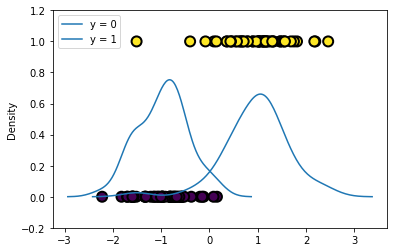

In [18]:
from sklearn.datasets import make_classification
import seaborn as sns

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.kdeplot(data=X0[y == 0, :], label="y = 0")
sns.kdeplot(data=X0[y == 1, :], label="y = 1")
plt.legend()
plt.ylim(-0.2, 1.2)
plt.show();

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 `Logit` 를 지원합니다. 사용방법은 `OLS` 클래스 사용법과 동일합니다. 종속변수와 독립변수 데이터를 넣어 모형을 만들고 `fit` 메서드로 학습을 시킵니다. `fit` 메서드의 `disp=0` 인수는 최적화 과정에서 문자열 메세지를 나타내지 않는 역할을 합니다.

In [19]:
X0.reshape(-1)

array([-0.56511345,  1.81256131, -1.33619806,  1.74890611, -0.19702637,
       -0.97174619,  0.09145142, -0.81781175,  1.02115611, -0.37608967,
       -0.63998141,  1.09331425, -1.04567041, -1.82248917,  0.66737508,
       -1.33802467,  1.03973007,  1.02861972,  1.46827084,  1.20747622,
       -1.60045596, -0.1215664 ,  1.12325354, -1.21712319,  0.6186367 ,
        1.46318811,  1.68552793,  0.36681905,  0.68897352,  0.15405526,
        1.14288962, -0.08399356,  1.3275078 , -2.22397948, -1.15725619,
       -0.97375549, -1.59369901, -0.827541  , -0.97605292,  1.51279225,
        0.4668358 ,  0.89903364, -0.7953375 , -0.58656328, -1.70642152,
       -0.97508192,  0.6421675 , -1.51023072, -0.40132266, -0.5657922 ,
        1.1056454 ,  0.77950937,  1.17691635, -1.51693555,  1.55036554,
       -1.14336585, -0.68930413,  1.25336383,  0.89682787, -0.82754261,
       -1.57386341,  0.08372829,  1.02210971,  1.1749706 ,  1.11108368,
       -0.58366968,  0.35396347, -0.91700612,  2.19088642,  1.01

In [20]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [21]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.7679
Time:                        21:51:03   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


결과 객체에서 `summary` 메서드를 사용하여 리포트를 출력할 수 있습니다. 결과 리포트에서 판별함수의 수식이 다음과 같다는 것을 알 수 있습니다.

$$ 
\mu(x) = \sigma(4.2382x + 0.2515)
$$

따라서 $z$값의 부호를 나누는 기준값은 $4.2382x + 0.2515 = 0.5$가 되는 $x$값 즉, $(0.5-0.2515)/4.2382$다.

`predict` 메서드를 사용하면 $\mu(x)$값을 출력합니다.


p-value를 감안하면 상수항의 값은 0과 마찬가지이므로 $\mu(x)$가 다음과 같다고 추정해볼 수도 있습니다. 

$$ 
\mu(x) = \sigma(4.2382x)
$$

이렇게 생각하면 $z$값의 부호를 나누는 기준값은 실질적으로는 $0.5/4.2382=0.118$이 될 수도 있겠네요.

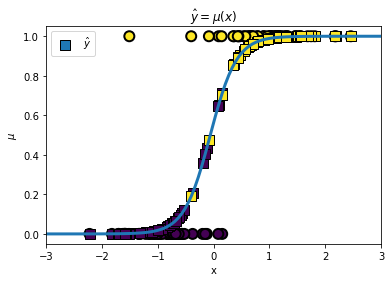

In [22]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### MedGPA Dataset
다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같습니다.

* `Acceptance`: 0이면 불합격, 1이면 합격
* `BCPM`: Bio/Chem/Physics/Math 과목의 학점 평균
* `GPA`: 전체과목 학점 평균
* `VR`: MCAT Verbal reasoning 과목 점수
* `PS`: MCAT Physical sciences 과목 점수
* `WS`: MCAT Writing sample 과목 점수
* `BS`: MCAT Biological sciences 과목 점수
* `MCAT`: MCAT 촘점
* `Apps`: 의대 지원 횟수

In [23]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


일단 학점(GPA)과 합격여부의 관계를 살펴봅시다.

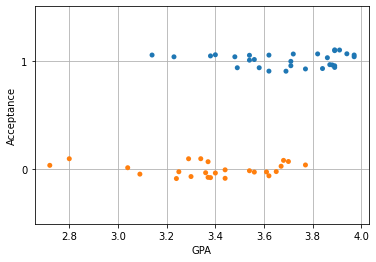

In [24]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

로지스틱 회귀분석을 실시합시다. `MCAT = VR + PS + WS + BS`이므로 이 `MCAT`은 독립 변수에서 제외해야 맞습니다.

In [25]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.5913
Time:                        21:55:14   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

예측 결과와 실제 결과를 비교하면 다음과 같습니다.

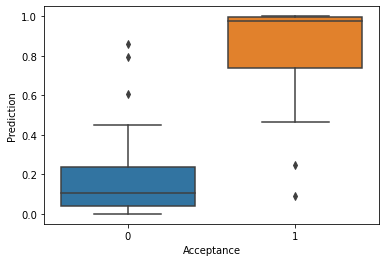

In [26]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

위 분석 결과를 토대로 유의하지 않은 변수들을 제외하고 PS와 BS 점수만을 이용하여 다시 회귀분석하면 다음과 같습니다.

In [27]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.3315
Time:                        21:56:23   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

위 결과를 바탕으로 다음 점수가 $15.5427+0.5$보다 크면 합격이라고 예측할 수 있습니다.

$$
0.4798 \text{PS} + 1.1464 \text{BS}
$$

### Regression analysis using logistic regression
로지스틱 회귀는 분류문제뿐만 아니라 종속변수 $y$가 0부터 1까지 막혀있는 회귀분석 문제에도 사용할 수 있다. 이때는 다음처럼 $\mu$ 값을 종속변수 y의 예측값으로 사용합니다.

$$ \hat{y} = \mu(x) $$

만약 실제 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿔야 합니다. 이번에는 다루지 않겠습니다.

다음 데이터는 1974년도에 "여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다."라는 주장에 대한 찬성, 반대 입장을 조사한 결과입니다. 각 열은 다음을 뜻합니다.

* `education`: 교육 기간
* `sex`: 성별
* `agree`: 찬성 인원
* `disagree`: 반대 인원
* `ratio`: 찬성 비율

In [28]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


교육을 많이 받은 사람일수록 찬성 비율이 감소하는 것을 볼 수 있습니다.

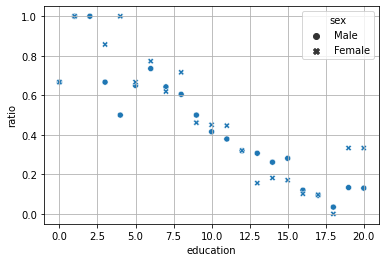

In [29]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

분석 결과는 다음과 같습니다.

In [30]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.3435
Time:                        21:59:12   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

성별은 유의하지 않다는 것을 알게되었습니다. 그러면 성별을 제외하고 다시 모형을 구해봅시다.

In [31]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.3422
Time:                        21:59:48   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

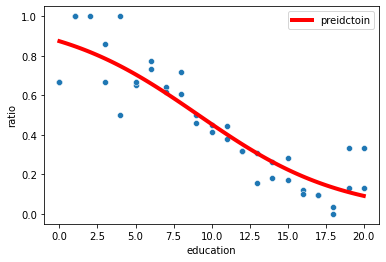

In [32]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="preidctoin")
plt.legend()
plt.show()

# Today
- 머신러닝이란 무엇인가
- 회귀분석?
- 선형회귀분석
- 로지스틱회귀분석

# Next class
- 의사결정나무

# Reference
- https://datascienceschool.net/